In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
import tensorflow as tf

# Data

In [2]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [3]:
print(f"train_x : {x_train.shape}\ttest_x : {x_test.shape}\ttrain_y : {y_train.shape}\ttest_y : {y_test.shape}")


train_x : (60000, 28, 28)	test_x : (10000, 28, 28)	train_y : (60000,)	test_y : (10000,)


In [4]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

#### Values in  x_train and x_test  matrix of size(28 X 28) are ranged between (0-255)

# Data Exploring

Number of below image is [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.] 


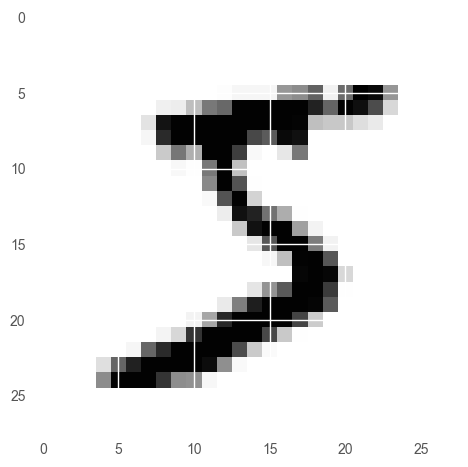

In [102]:
plt.imshow(x_train[0]) 
print(f"Number of below image is {y_train[0]} ")

Number of below image is [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.] 


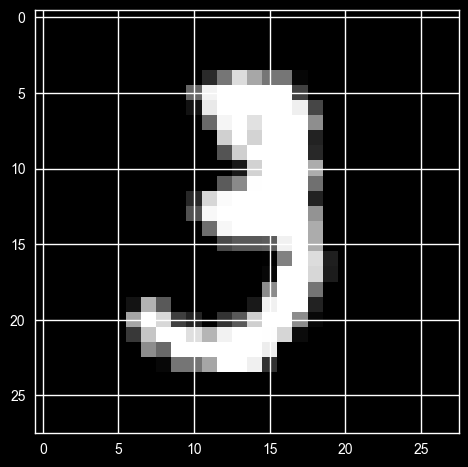

In [99]:
plt.imshow(x_train[10],cmap='gray')
print(f"Number of below image is {y_train[10]} ")

# Normalizing the data (b/w 0 -1)
To make calculations faster 

In [7]:
# Before normalizing values ranged b/w (0 - 255)
x_test[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [8]:
# min value is 0 and max value is 255
x_train = x_train/255.0
x_test = x_test/255.0

In [9]:
# after normalizing values are ranged b/w(0-1)
x_test[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

# converting y_train and y_test features(continous) into (categorical)

In [10]:
y_train = tf.one_hot(y_train,10) # 10 because we have 10 values(0,1,2,3,4,5,6,7,8,9,10)
y_test  = tf.one_hot(y_test,10)

In [11]:
y_test[:2]

<tf.Tensor: shape=(2, 10), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)>

In [12]:
y_train[:2]

<tf.Tensor: shape=(2, 10), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)>

# Model creation

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,InputLayer,Flatten
from tensorflow.keras.optimizers import Adam,SGD,RMSprop
from tensorflow.keras.losses import mse,mae,sparse_categorical_crossentropy

In [14]:
model = Sequential([
           # InputLayer(input_shape=x_train[0,:].shape),
            Flatten(),
            Dense(40,input_shape=(x_train[0,:]),activation='relu'),
            Dense(30,activation='relu'),
            Dense(10,activation='softmax')
])

In [15]:
model.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer=RMSprop(),
              metrics = ['accuracy'],
             )

# Training the Neural Networks

In [16]:
hist = model.fit(x_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 3ms/step - loss: 0.3342 - accuracy: 0.9044
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1697 - accuracy: 0.9502
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1340 - accuracy: 0.9611
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1126 - accuracy: 0.9676
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0989 - accuracy: 0.9709
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0909 - accuracy: 0.9738
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0834 - accuracy: 0.9758
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0784 - accuracy: 0.9779
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0736 - accuracy: 0.9794
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.069

# Evaluating model

In [17]:
model.evaluate(x_train,y_train)

1875/1875 [==============================] - 4s 2ms/step - loss: 0.0593 - accuracy: 0.9836


[0.05932551994919777, 0.9835500121116638]

In [18]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1268 - accuracy: 0.9709


[0.12675268948078156, 0.9708999991416931]

In [19]:
y_pred = model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [20]:
import numpy as np

In [21]:
np.argmax(y_pred[0])

7

### first value of our testing set is predicted as 7 lets check the actual value

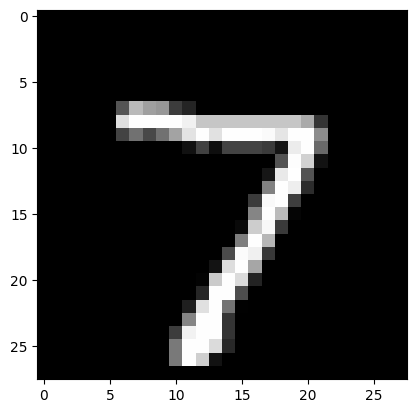

In [22]:
plt.imshow(x_test[0],cmap='gray')

Text(0, 0.5, 'Accuracy')

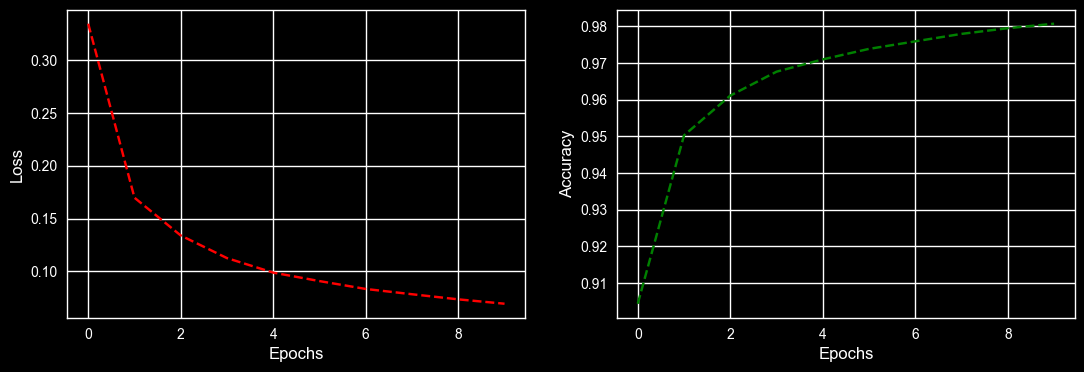

In [96]:
tmp_visualise_data = pd.DataFrame(hist.history)

plt.style.use('dark_background')
fig,axs = plt.subplots(nrows=1,ncols=2,figsize=(13,4))
axs[0].plot(tmp_visualise_data['loss'],label='Loss with respect to the epochs',linestyle='--',color='r')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')
axs[1].plot(tmp_visualise_data['accuracy'],label='accuracy with respect to the epochs',linestyle='--',color='g')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Accuracy')


In [93]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

# Lets check the accuracy of testing model

In [26]:
from sklearn.metrics import accuracy_score,confusion_matrix
import seaborn as sns

Text(95.72222222222221, 0.5, 'y - Actual')

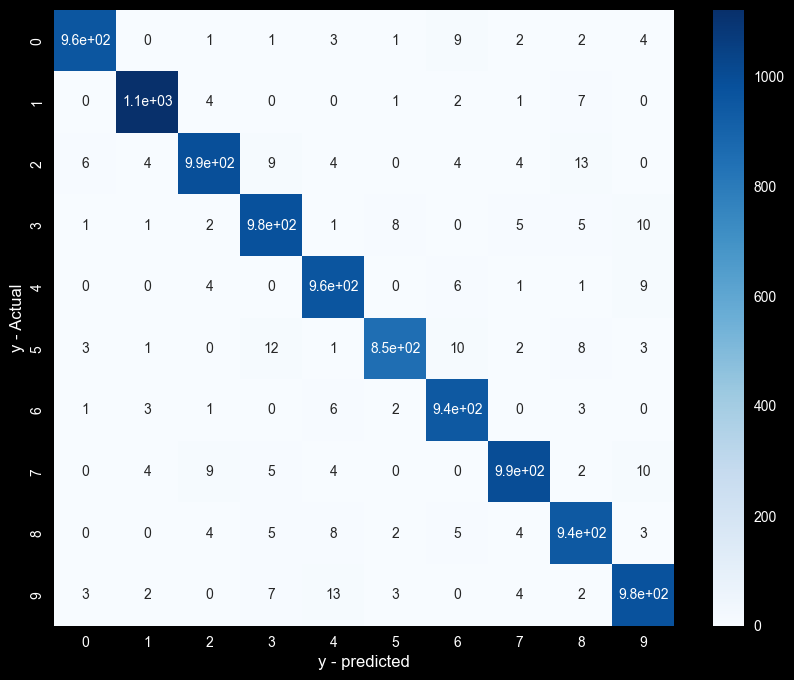

In [97]:
y_true = np.argmax(y_test,axis=1)
y_pred_classes = np.argmax(y_pred,axis=1)


fig,ax = plt.subplots(figsize=(10,8))
ax = sns.heatmap(confusion_matrix(y_true,y_pred_classes),cmap='Blues',annot=True)
ax.set_xlabel('y - predicted')
ax.set_ylabel('y - Actual')

In [55]:
accuracy_score(y_true,y_pred_classes) * 100

97.09

--------------------------------------------------------------------------------------------------------------------------------

Accuracy on our Train data is 98.07 %
Accuracy on our test data is 97.09 %

Loss on Train Data : 0.05
Loss on Test Data : 0.12

Accuracy on Both train and test Data is satisfied but the loss little high (in neural networks it is ok to have a little high loss on test data than train data)

# conclusion:
    
    We Build a Generalised Basic Artificial Neural Network Model


--------------------------------------------------------------------------------------------------------------------------------